# El modelo epidémico de SIR
Una descripción matemática simple de la propagación de una enfermedad en una población es el llamado modelo SIR, que divide la población (fija) de N individuos en tres "compartimentos" que pueden variar en función del tiempo, t:

* S(t) son aquellos susceptibles pero aún no infectados con la enfermedad;
* I(t) es el número de individuos infecciosos;
* R(t) son aquellas personas que se han recuperado de la enfermedad y ahora tienen inmunidad.

El modelo SIR describe el cambio en la población de cada uno de estos compartimentos en términos de dos parámetros,  beta y  gamma.  
- Beta describe la tasa de contacto efectiva de la enfermedad: un individuo infectado entra en contacto con  beta*N otros individuos por unidad de tiempo (de los cuales la fracción que es susceptible a contraer la enfermedad es S/N).  
- Gamma es la tasa de recuperación promedio: es decir, 1/ gamma es el período de tiempo promedio durante el cual una persona infectada puede transmitirlo.

Las ecuaciones diferenciales que describen este modelo fueron derivadas primero por Kermack y McKendrick [ Proc. R. Soc. A , 115 , 772 (1927)]:

\begin{align*}
\frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta S I}{N},\\
\frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta S I}{N} - \gamma I,\\
\frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I.
\end{align*}

El siguiente código de Python integra estas ecuaciones para una enfermedad caracterizada por los parámetros  beta=0.2, gamma=10  en una población de N=1000 (quizás 'gripe en una escuela ) El modelo se inicia con una sola persona infectada el día 0: I(0)=1. Las curvas trazadas de S(t), I(t) y R(t) están diseñadas para verse un poco mejor que los valores predeterminados de Matplotlib.

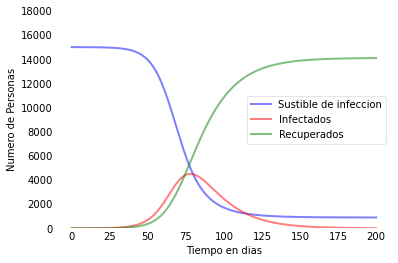

In [59]:
#Importar las librerias.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total de la poblacion
N = 15000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0
# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 15 dias.
beta, gamma = 0.2, 1.0/15 
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 200, 200)


# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados


#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Ro = beta/gamma
#print(Ro)


## Generar la prediccion del modelos SIR

 Se debe  estimar el valor de 
- β 
- γ

Para ajustar el modelo SIR con los casos confirmados reales (el número de personas infecciosas) del Ecuador.
 
 Para ello deben seguir el siguiente tutorial 
 https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html
 


In [18]:
import numpy as np 
from time import time
import pandas as pd
from datetime import datetime,timedelta
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

In [32]:
link_Confirmed = 'https://raw.githubusercontent.com/Lewuathe/COVID19-SIR/master/data/time_series_19-covid-Confirmed.csv'
link_Deaths = 'https://raw.githubusercontent.com/Lewuathe/COVID19-SIR/master/data/time_series_19-covid-Deaths.csv'
link_Recovered = 'https://raw.githubusercontent.com/Lewuathe/COVID19-SIR/master/data/time_series_19-covid-Recovered.csv'

In [93]:
START_DATE = {'Ecuador': '3/20/20'}

Start time: 2021-08-06 02:51:29.514395
Beta: 0.0000071428 
Gamma: 0.0000071428 


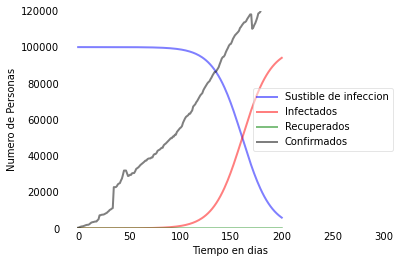

Elapsed time: 53.1945629517 seconds.


In [125]:
# Implementar y explicar la predicion del modelo SIR para el Ecuador

# 1. Implementar solo teniendo en cuenta los casos confirmados

print("Start time: "+str(datetime.now()))

def fx(point, data):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [S0,I0,R0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))


df = pd.read_csv(link_Recovered)
country_df = df[df['Country/Region'] == country]
recovered = country_df.iloc[0].loc[START_DATE[country]:]


df = pd.read_csv(link_Deaths)
country_df = df[df['Country/Region'] == country]
death = country_df.iloc[0].loc[START_DATE[country]:]

df = pd.read_csv(link_Confirmed)
country_df = df[df['Country/Region'] == country]
confirmed = country_df.iloc[0].loc[START_DATE[country]:]

data = (confirmed  - death)
 
# Total de la poblacion
#N = 193582
N = 100000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0


fxmin = minimize(fx, [0.001, 0.001], args=(data), method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])

beta, gamma = fxmin.x

print("Beta: %0.10f " % beta)
print("Gamma: %0.10f " % gamma)

beta *= 10000
#gamma *= 100000 
# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 15 dias.
#beta, gamma = 0.589,0.045
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 200, 200)

# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados

#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.plot(range(len(confirmed)), confirmed, 'black', alpha=0.5, lw=2, label='Confirmados') 
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
elapsed_time = (time() - start_time)/60
plt.show()


fig.savefig(f"Ecuador {datetime.now()}.png")

#Ro = beta/gamma
#print(Ro)

print("Elapsed time: %0.10f seconds." % elapsed_time)



Start time: 2021-08-06 02:52:04.525529
Beta: 0.0000015545 
Gamma: 0.0315953595 


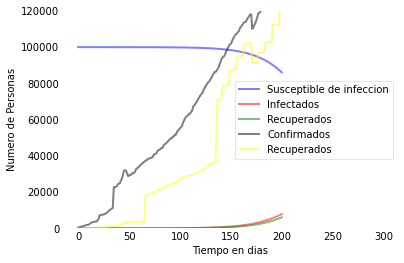

Elapsed time: 58.3844509204 seconds.


In [126]:
# 2. Implementar teniendo en cuenta los casos confirmados y recuperados.

# 2. Implementar teniendo en cuenta los casos confirmados y recuperados.
print("Start time: "+str(datetime.now()))

def fx(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

df = pd.read_csv(link_Recovered)
country_df = df[df['Country/Region'] == country]
recovered = country_df.iloc[0].loc[START_DATE[country]:]


df = pd.read_csv(link_Deaths)
country_df = df[df['Country/Region'] == country]
death = country_df.iloc[0].loc[START_DATE[country]:]

df = pd.read_csv(link_Confirmed)
country_df = df[df['Country/Region'] == country]
confirmed = country_df.iloc[0].loc[START_DATE[country]:]


data = (confirmed - recovered - death)
 
# Total de la poblacion
#N = 193582
N = 100000
#N =15000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0


fxmin = minimize(fx, [0.001, 0.001], args=(data, recovered, S0, I0, R0), method='L-BFGS-B', bounds=[(0.00000001, 0.4), (0.00000001, 0.4)])

beta, gamma = fxmin.x

print("Beta: %0.10f " % beta)
print("Gamma: %0.10f " % gamma)

beta *= 100000/2
#gamma *= 100000 
# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 15 dias.
#beta, gamma = 0.589,0.045
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 200, 200)

# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados


#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.plot(range(len(confirmed)), confirmed, 'black', alpha=0.5, lw=2, label='Confirmados')
ax.plot(range(len(confirmed)), recovered, 'yellow', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
elapsed_time = (time() - start_time)/60
plt.show()

fig.savefig("Confirmados-y-Recuperados.png")

#Ro = beta/gamma
#print(Ro)

print("Elapsed time: %0.10f seconds." % elapsed_time)




## Calculos de incidencia

Para obtener metricas de incidencia se debe calcular la tasa de prevalencia, incidencia y la relacion, para esto leer y obtener estos datos con la ultima lectura.

https://www.paho.org/hq/index.php?option=com_content&view=article&id=14402:indicadores-de-salud-aspectos-conceptuales-y-operativos-seccion-2&catid=9894&limitstart=2&Itemid=101&lang=es

In [127]:
# Implementar
print("Tasa de incidencia: "+str((confirmed[len(confirmed)-1]/N)*np.power(10,1)))
print("Tasa de prevalencia: "+str((confirmed[len(confirmed)-1]/17268000)*np.power(10,4)))
print("Relacion: "+str(((confirmed[len(confirmed)-1]/N)*np.power(10,1) )*30 ))

Tasa de incidencia: 22.4315
Tasa de prevalencia: 129.90213110956682
Relacion: 672.9449999999999


## Analisis

El analisis de datos para una epidemia puede resultar muy complejo sobre todo cuando el numero de datos crece respecto a los dias que pasa. El metodo SIR trata de predecir cuando tiempo tendra que pasar hasta que una poblacion se infecte con el patogeno, asi mismo, aunque cabe recalcar que en este metodo no se tienen en cuenta las medidas que puede aplicar la autoridad de dicha localidad o una posible vacuna.

La tasa de incidencia se define como el número de casos nuevos de una enfermedad u otra condición de salud dividido por la población en riesgo de la enfermedad (población expuesta) en un lugar específico y durante un período especifico.

La tasa de prevalencia se define como el número de casos existentes de una enfermedad u otro evento de salud dividido por el número de personas de una población en un período específico. 

La tasa de prevalencia de una enfermedad (u otro trastorno) es directamente proporcional al producto de su tasa de incidencia por la duración media de la enfermedad.

## Conclusiones

Como se puede observar en los modelos se predice los modelos los valores de confirmados y recuperados siguen en incremento por la recta que tiene, con unos datos de 10000, ya que no es el proceso para todos los datos obtenidos tiene un tiempo muy largo de ejecución. El gamma y betta cambiaran de acuerdo a os datos que se obtengan.

## Opinion
Con respecto a los datos se obtuvo los mas actualizados posibles.
Los graficos nos demuestran que seguiremos con la misma curva , pero dado la situacion del pais esta se espera que la curva llegue a su pico en unas semanas o meses.

# Referencias:
- https://www.agenciasinc.es/Reportajes/Un-modelo-un-teorema-y-teoria-de-juegos-contra-el-coronavirus
- https://rpubs.com/dsfernandez/422937
- https://towardsdatascience.com/modelling-the-coronavirus-epidemic-spreading-in-a-city-with-python-babd14d82fa2